In [1]:
#Importing neccesary library and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2 
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense, Dropout,MaxPooling2D, BatchNormalization
from keras.layers import Flatten,Conv2D
from keras.utils import image_dataset_from_directory
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import image_dataset_from_directory
from keras.models import Sequential

In [2]:
#image resizing
img_size = (120, 120)
batch_size = 32

In [3]:
#Prapare dataset for classification
data_dir='dataset2'
filnames=tf.constant([os.path.join(data_dir,fname)for fname in os.listdir(data_dir)])
dataset=tf.data.Dataset.from_tensor_slices((filnames))

In [4]:
def preprocess_image(filename):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image

In [5]:
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(batch_size=batch_size, drop_remainder=True)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [6]:
class_labels=['rain','cloud','shine','sunrise']

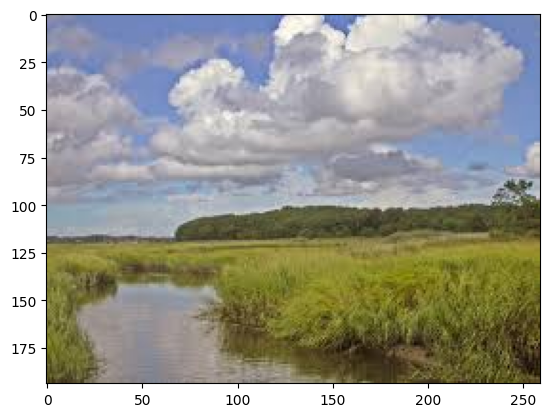

In [7]:
img=plt.imread('dataset2/cloud/cloudy100.jpg')
plt.imshow(img)

In [8]:
path='dataset2'
classes=os.listdir(path)
classes

['cloud', 'rain', 'shine', 'sunrise']

In [45]:
#Classifing dataset for corresponding classes
fig = plt.gcf()
fig.set_size_inches(16, 16)
cloud_dir = os.path.join('dataset2/cloud')
rain_dir = os.path.join('dataset2/rain')
shine_dir = os.path.join('dataset2/shine')
sunrise_dir = os.path.join('dataset2/sunrise')
cloud_names = os.listdir(cloud_dir)
rain_names = os.listdir(rain_dir)
shine_names = os.listdir(shine_dir)
sunrise_names = os.listdir(sunrise_dir)

pic_index = 200
  
cloud_images = [os.path.join(cloud_dir, fname)
              for fname in cloud_dir[pic_index-8:pic_index]]
rain_images = [os.path.join(rain_dir, fname)
              for fname in rain_dir[pic_index-8:pic_index]]
shine_images = [os.path.join(shine_dir, fname)
              for fname in shine_dir[pic_index-8:pic_index]]
sunrise_images = [os.path.join(sunrise_dir, fname)
              for fname in sunrise_dir[pic_index-8:pic_index]]
  
for i, img_path in enumerate( rain_images+sunrise_images +cloud_images+shine_images):
    sp = plt.subplot(8, 8, i+1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()

<Figure size 1600x1600 with 0 Axes>

In [10]:
#Spliting dataset into tarin , test and validation sets
base_dir = 'dataset2'


train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(120,120),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(120,120),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)



Found 1125 files belonging to 4 classes.
Using 1013 files for training.
Found 1125 files belonging to 4 classes.
Using 112 files for validation.


In [11]:
#Building NN model
model=Sequential()


model.add(Conv2D(16,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(2,2))



model.add(Flatten())
model.add(Dense(512,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))




In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 batch_normalization (Batch  (None, 57, 57, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                        

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
#Fitting test data for evaluation
model.fit(train_datagen,epochs=15,validation_data=test_datagen)

Epoch 1/15
32/32 [==============================] - 15s 358ms/step - loss: 1.6601 - accuracy: 0.3544 - val_loss: 1.2988 - val_accuracy: 0.3750
Epoch 2/15
32/32 [==============================] - 11s 324ms/step - loss: 1.0484 - accuracy: 0.5597 - val_loss: 1.0072 - val_accuracy: 0.5000
Epoch 3/15
32/32 [==============================] - 10s 282ms/step - loss: 0.8873 - accuracy: 0.6239 - val_loss: 0.8338 - val_accuracy: 0.5893
Epoch 4/15
32/32 [==============================] - 9s 259ms/step - loss: 0.8972 - accuracy: 0.6328 - val_loss: 0.9514 - val_accuracy: 0.5625
Epoch 5/15
32/32 [==============================] - 10s 308ms/step - loss: 0.7505 - accuracy: 0.6802 - val_loss: 0.7234 - val_accuracy: 0.6696
Epoch 6/15
32/32 [==============================] - 11s 320ms/step - loss: 0.6383 - accuracy: 0.7127 - val_loss: 0.6618 - val_accuracy: 0.7143
Epoch 7/15
32/32 [==============================] - 13s 401ms/step - loss: 0.6340 - accuracy: 0.7423 - val_loss: 0.6292 - val_accuracy: 0.7679


In [15]:
model.save('Image Classifiier Weather')

INFO:tensorflow:Assets written to: Image Classifiier Weather\assets


INFO:tensorflow:Assets written to: Image Classifiier Weather\assets


In [16]:
loss,acc_=model.evaluate(test_datagen)

4/4 [==============================] - 0s 59ms/step - loss: 0.3990 - accuracy: 0.8661


In [46]:
#Prediction for result
pred2=model.predict(np.array([img2]))

pred2

1/1 [==============================] - 0s 60ms/step


array([[0.5596282 , 0.32486877, 0.08464833, 0.03085466]], dtype=float32)

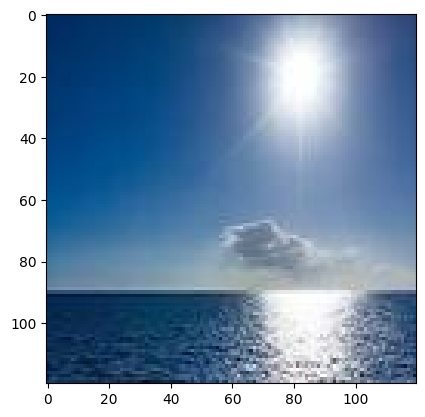

In [37]:
img3=plt.imread('shine_test.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img3,cmap=plt.cm.binary)


In [38]:
img3.shape

(120, 120, 3)

In [39]:
pred3=model.predict(np.array([img3]))
indx=np.argmax(pred3)
print(f'prediction is {class_labels[indx]}')

1/1 [==============================] - 0s 59ms/step
prediction is shine


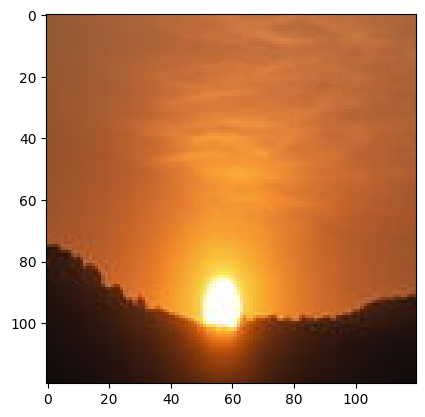

In [40]:
img4=plt.imread('sunrise_test.jpg')
#img4=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img4,cmap=plt.cm.binary)

In [41]:
img4.shape

(120, 120, 3)

In [42]:
pred4=model.predict(np.array([img4]))
indx=np.argmax(pred4)
print(f'prediction is {class_labels[indx]}')

1/1 [==============================] - 0s 32ms/step
prediction is sunrise
